# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:

import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

crops = pd.read_csv("soil_measures.csv")

crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [2]:
crops.info()

<class 'pandas.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   str    
dtypes: float64(1), int64(3), str(1)
memory usage: 86.1 KB


In [3]:
crops['crop'].unique()

<StringArray>
[       'rice',       'maize',    'chickpea', 'kidneybeans',  'pigeonpeas',
   'mothbeans',    'mungbean',   'blackgram',      'lentil', 'pomegranate',
      'banana',       'mango',      'grapes',  'watermelon',   'muskmelon',
       'apple',      'orange',      'papaya',     'coconut',      'cotton',
        'jute',      'coffee']
Length: 22, dtype: str

## Encoding of categorical features

In [4]:

crops_encoded = crops.copy()

encoder = LabelEncoder()

crops_encoded['crop'] = encoder.fit_transform(crops_encoded['crop'])

In [5]:
crops_encoded.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,20
1,85,58,41,7.038096,20
2,60,55,44,7.840207,20
3,74,35,40,6.980401,20
4,78,42,42,7.628473,20


In [6]:
crops_encoded['crop'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [7]:
crops_encoded['crop'] = crops_encoded['crop'].astype('category')

In [8]:
crops_encoded['crop'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20, 21],
, ordered=False, categories_dtype=int64)

## Empty and null values

In [9]:
crops_encoded.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [10]:
crops_encoded.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

## Basic Statistics

In [11]:
crops_encoded.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


## Box Plots and Histograms

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

def make_box_plots(df, cols=4, rows=-1):
    if (rows == -1):
        rows = math.ceil(len(df.columns) / cols)
    fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=df.columns
    )

    i = 1
    j = 1

    for col in df.columns:
        fig.add_trace(go.Box(y=df[col], name=col), row=i, col=j)
        if j < cols:
            j += 1
        else:
            j = 1
            i += 1
    fig.update_layout(
        autosize=False,
        width=1200,
        height=2000,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="LightSteelBlue",
    )

    for annotation in fig['layout']['annotations']:
        annotation['y'] += 0.005
    fig.show()


def make_histograms(df, cols=4, rows=-1):
    if (rows == -1):
        rows = math.ceil(len(df.columns) / cols)
    fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=df.columns
    )

    i = 1
    j = 1

    for col in df.columns:
        fig.add_trace(go.Histogram(x=df[col], name=col), row=i, col=j)
        if j < cols:
            j += 1
        else:
            j = 1
            i += 1
    fig.update_layout(
        autosize=False,
        width=1200,
        height=2000,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4
        ),
        paper_bgcolor="LightSteelBlue",
    )

    for annotation in fig['layout']['annotations']:
        annotation['y'] += 0.005

    fig.show()

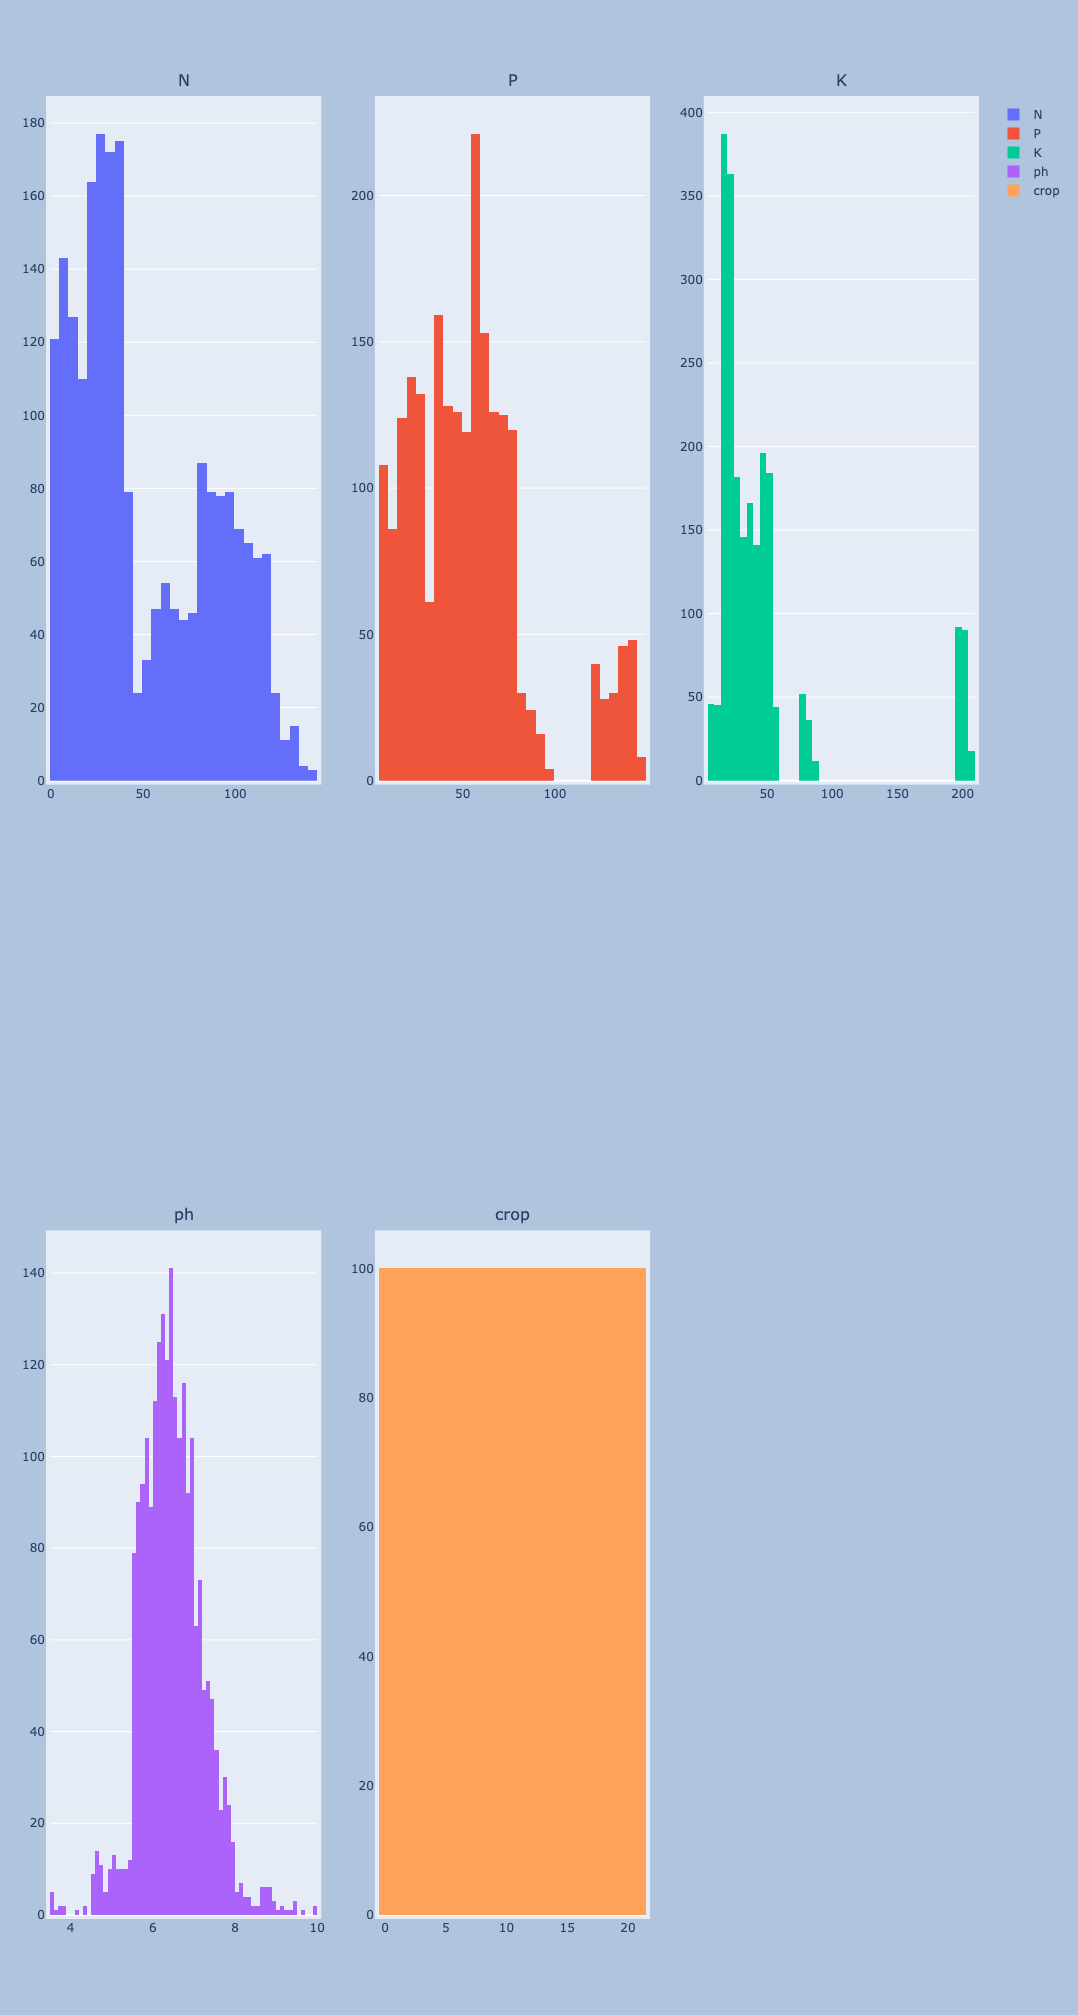

In [13]:
make_histograms(crops_encoded, 3)

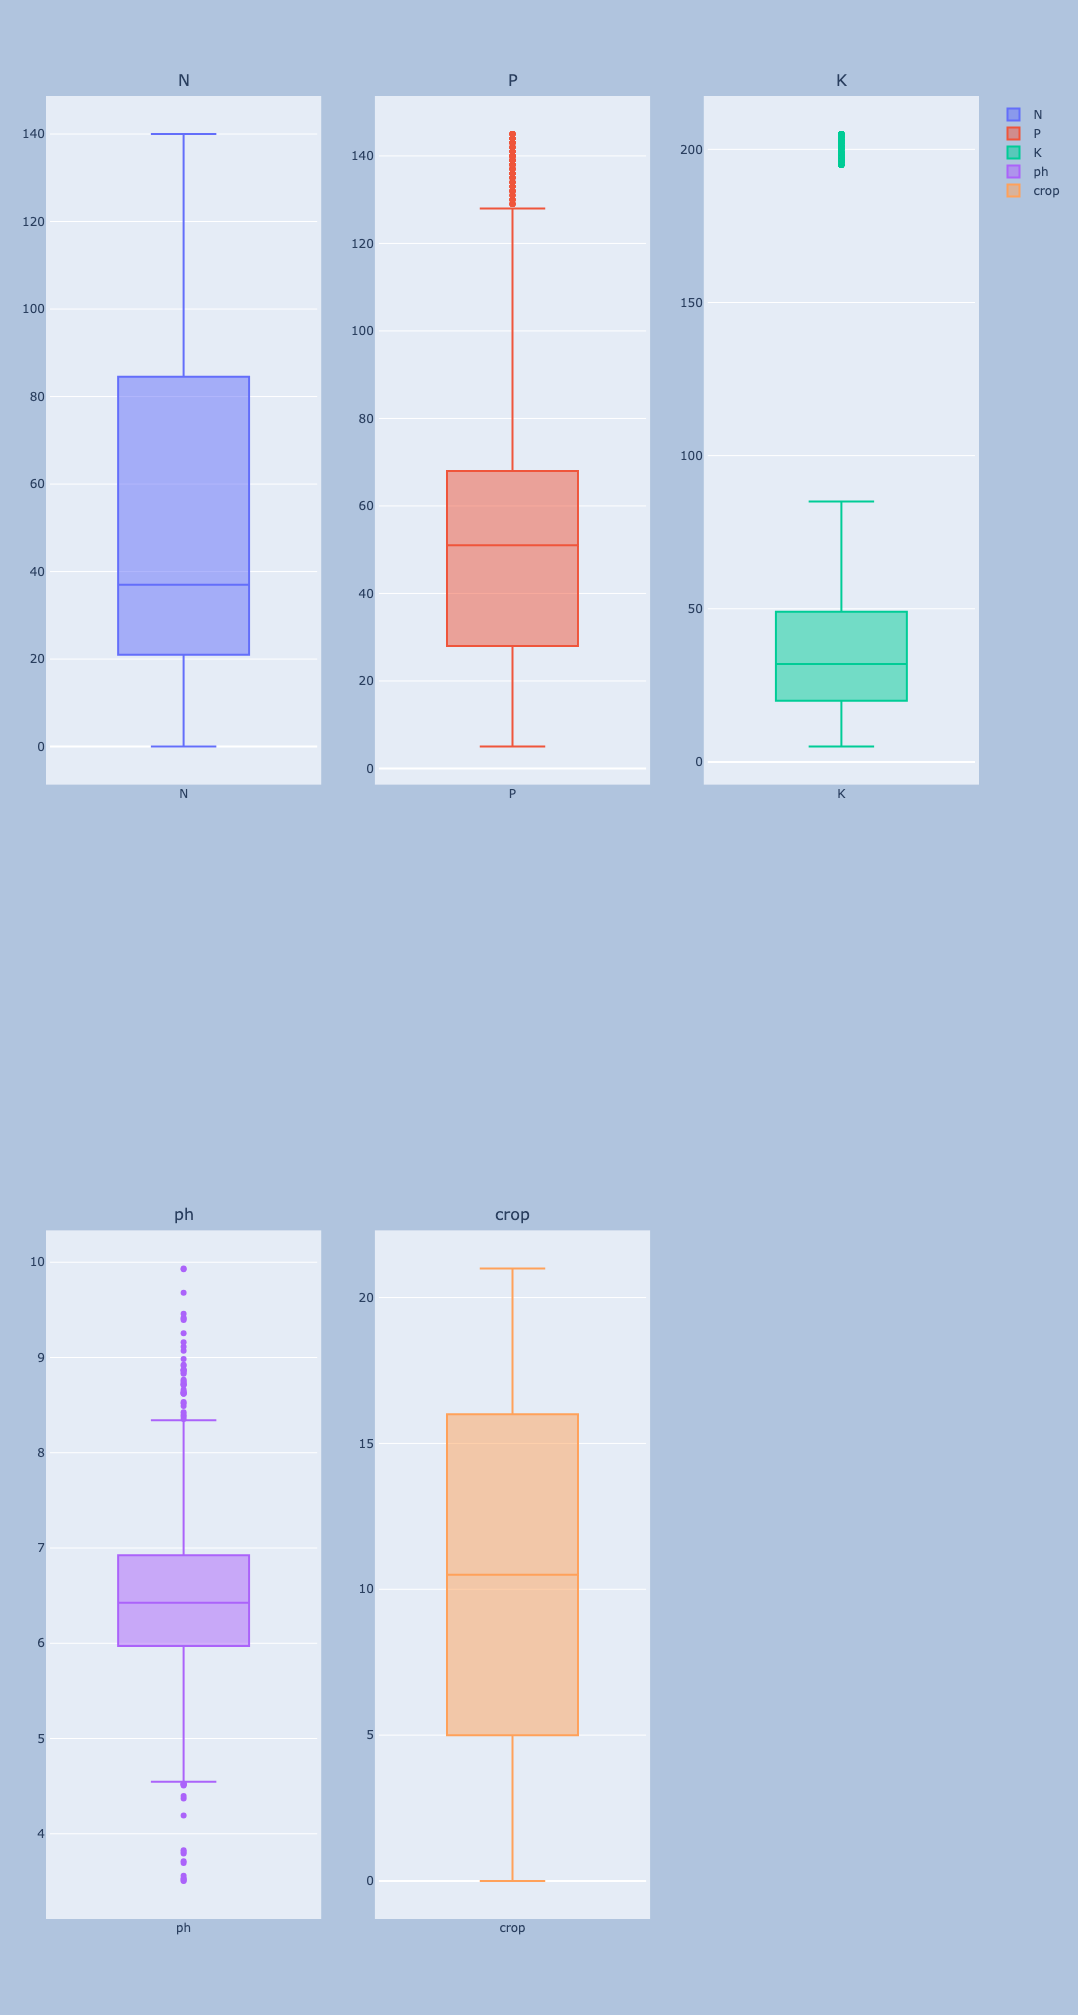

In [14]:
make_box_plots(crops_encoded, 3)

## Distribution of the Target Variable

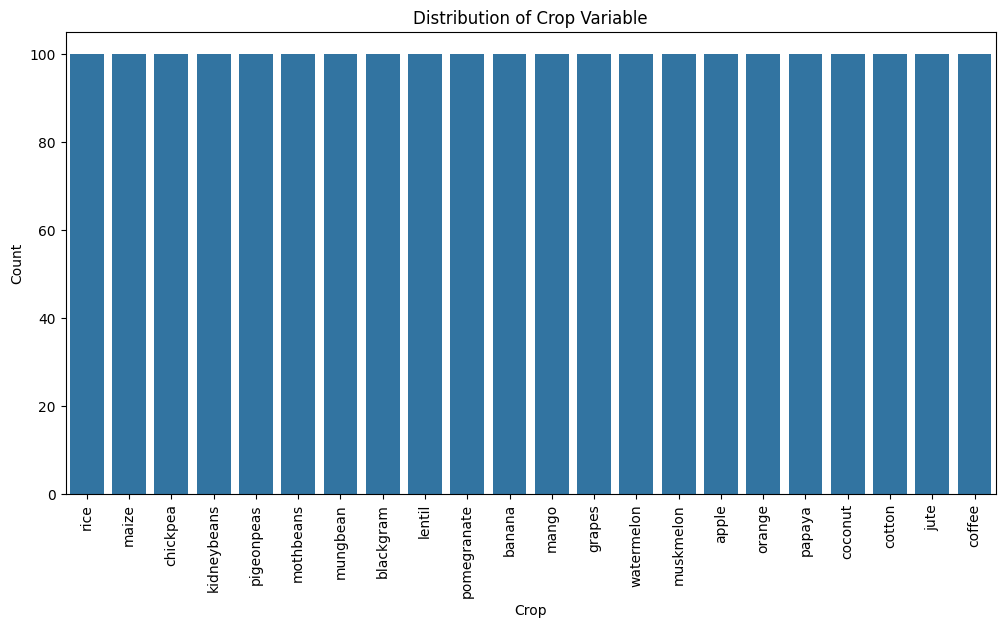

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=crops, x='crop', order=crops['crop'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crop Variable')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

We can see the target variable is balanced.

## Outlier Detection and Removal
Outliers can negatively affect model performance. We'll use the Interquartile Range (IQR) method to identify and remove them.

In [16]:
def remove_outliers_iqr(df, columns, multiplier=1.5):
    df_clean = df.copy()
    total_outliers = 0

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        total_outliers += outliers

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

        print(f"{col}: {outliers} outliers removed (bounds: [{lower_bound:.2f}, {upper_bound:.2f}])")

    print(f"\nTotal outliers removed: {total_outliers}")
    print(f"Original dataset size: {len(df)}")
    print(f"Cleaned dataset size: {len(df_clean)}")
    print(f"Percentage of data retained: {len(df_clean)/len(df)*100:.2f}%")

    return df_clean

feature_columns = ['N', 'P', 'K', 'ph']
crops_clean = remove_outliers_iqr(crops_encoded, feature_columns)

N: 0 outliers removed (bounds: [-73.88, 179.12])
P: 138 outliers removed (bounds: [-32.00, 128.00])
K: 62 outliers removed (bounds: [-19.00, 85.00])
ph: 63 outliers removed (bounds: [4.62, 8.38])

Total outliers removed: 263
Original dataset size: 2200
Cleaned dataset size: 1937
Percentage of data retained: 88.05%


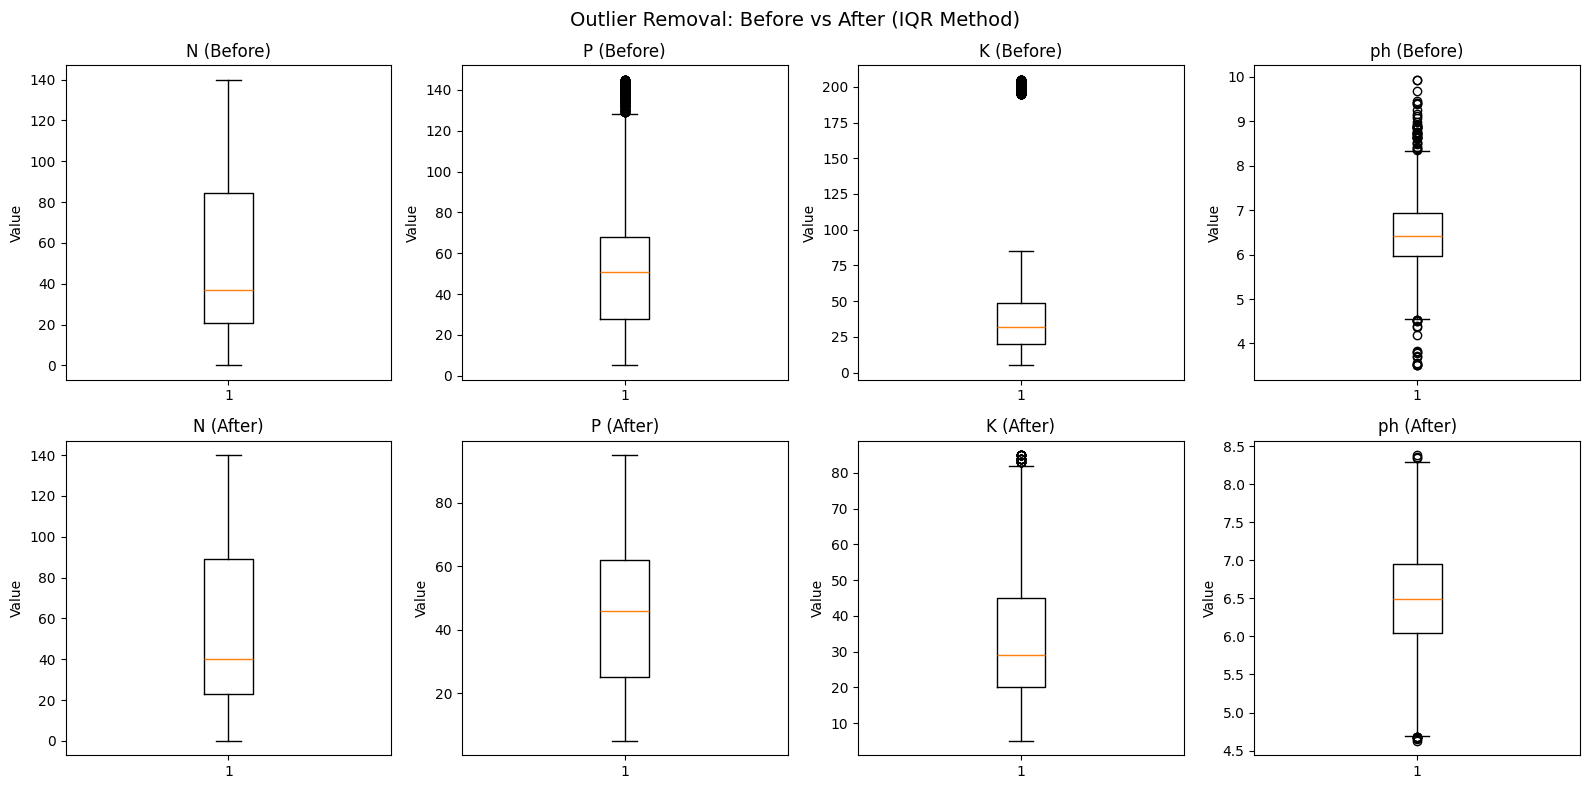

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, col in enumerate(feature_columns):
    axes[0, idx].boxplot(crops_encoded[col])
    axes[0, idx].set_title(f'{col} (Before)')
    axes[0, idx].set_ylabel('Value')

    axes[1, idx].boxplot(crops_clean[col])
    axes[1, idx].set_title(f'{col} (After)')
    axes[1, idx].set_ylabel('Value')

plt.suptitle('Outlier Removal: Before vs After (IQR Method)', fontsize=14)
plt.tight_layout()
plt.show()

## Data Normalization
Normalizing the features is important for algorithms like SVM, KNN, Neural Networks, and Logistic Regression that are sensitive to feature scales.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = crops_clean[feature_columns]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print("Original Data Statistics (after outlier removal):")
print(X.describe().round(2))
print("\nNormalized Data Statistics:")
print(X_scaled.describe().round(2))

Original Data Statistics (after outlier removal):
             N        P        K       ph
count  1937.00  1937.00  1937.00  1937.00
mean     54.38    45.15    33.00     6.50
std      37.46    22.27    16.58     0.67
min       0.00     5.00     5.00     4.63
25%      23.00    25.00    20.00     6.04
50%      40.00    46.00    29.00     6.49
75%      89.00    62.00    45.00     6.95
max     140.00    95.00    85.00     8.38

Normalized Data Statistics:
             N        P        K       ph
count  1937.00  1937.00  1937.00  1937.00
mean      0.00     0.00    -0.00    -0.00
std       1.00     1.00     1.00     1.00
min      -1.45    -1.80    -1.69    -2.79
25%      -0.84    -0.91    -0.78    -0.68
50%      -0.38     0.04    -0.24    -0.02
75%       0.92     0.76     0.72     0.66
max       2.29     2.24     3.14     2.78


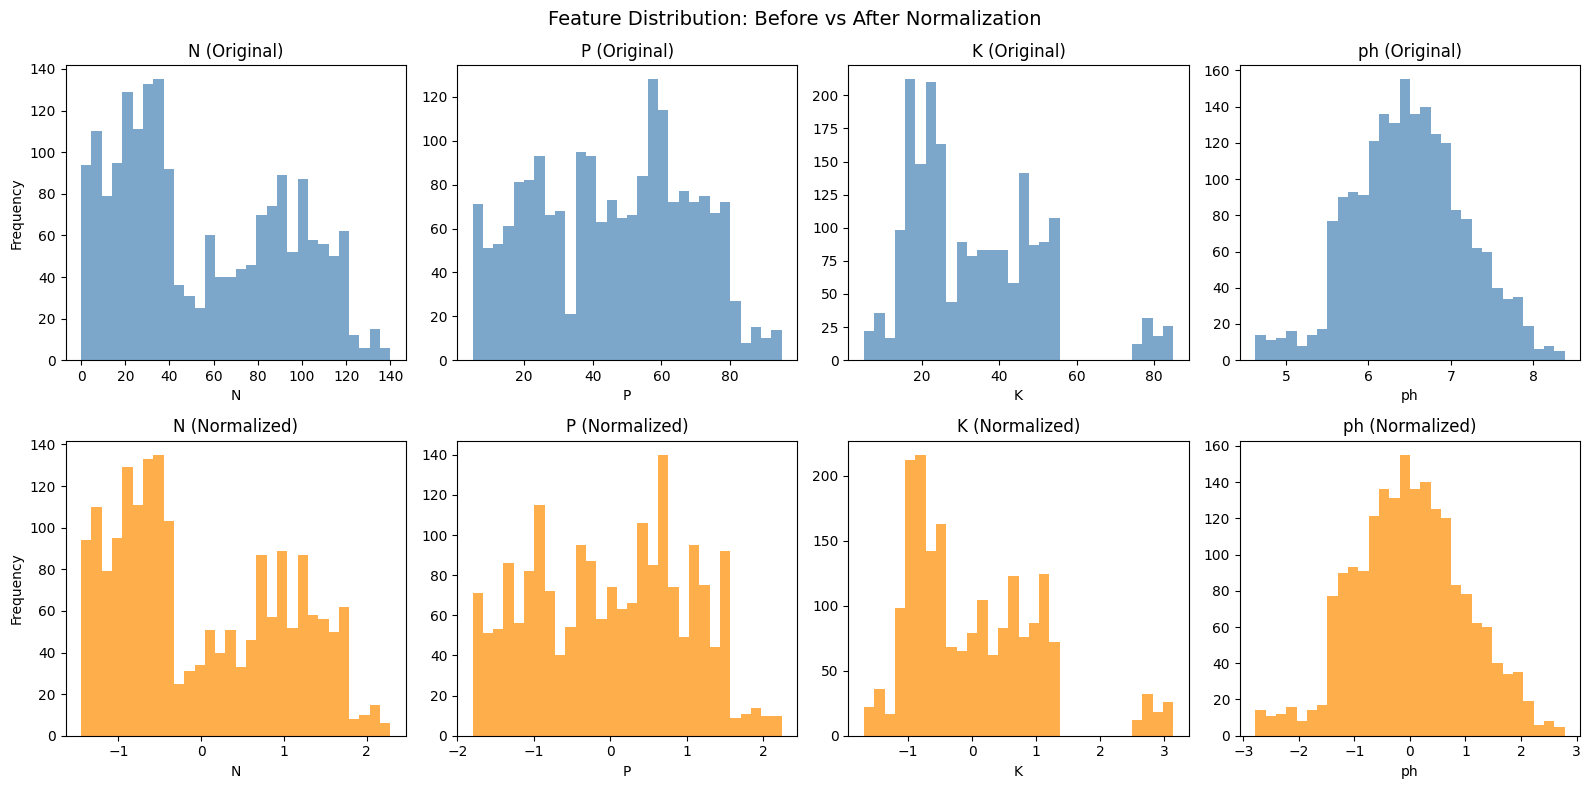

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, col in enumerate(X.columns):
    axes[0, idx].hist(X[col], bins=30, color='steelblue', alpha=0.7)
    axes[0, idx].set_title(f'{col} (Original)')
    axes[0, idx].set_xlabel(col)

    axes[1, idx].hist(X_scaled[col], bins=30, color='darkorange', alpha=0.7)
    axes[1, idx].set_title(f'{col} (Normalized)')
    axes[1, idx].set_xlabel(col)

axes[0, 0].set_ylabel('Frequency')
axes[1, 0].set_ylabel('Frequency')
plt.suptitle('Feature Distribution: Before vs After Normalization', fontsize=14)
plt.tight_layout()
plt.show()

In [20]:
X = X_scaled
X

,N,P,K,ph
0,0.951119,-0.141495,0.603216,-0.001530
1,0.817619,0.577275,0.482554,0.792594
2,0.150123,0.442505,0.663547,1.982954
3,0.523921,-0.455957,0.422223,0.706972
4,0.630720,-0.141495,0.542885,1.668733
...,...,...,...,...
2195,1.405016,-0.500880,-0.060424,0.409665
2196,1.191417,-1.354419,-0.362079,-0.618982
2197,1.698714,-0.545803,-0.181086,-0.209855
2198,1.672015,-0.590726,0.060237,0.378097


In [21]:
import numpy as np

y_clean = crops_clean['crop']
label_encoder = LabelEncoder()
y = pd.Series(label_encoder.fit_transform(y_clean), index=y_clean.index)
print(f"Classes after re-encoding: {np.unique(y)}")
print(f"Number of classes: {len(np.unique(y))}")
y

Classes after re-encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Number of classes: 20


0       18
1       18
2       18
3       18
4       18
        ..
2195     4
2196     4
2197     4
2198     4
2199     4
Length: 1937, dtype: int64

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building
Let's create a dataset for storing the results of different models.

In [23]:
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import numpy as np

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'Naive Bayes',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_nb),
    'Precision': metrics.precision_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_nb, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)



### Logistic Regression

In [25]:
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'Logistic Regression',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_lr),
    'Precision': metrics.precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)


### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'KNN',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_knn),
    'Precision': metrics.precision_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_knn, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

### Support Vector Machine

In [27]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'SVM',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_svm),
    'Precision': metrics.precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'Decision Tree',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_dt),
    'Precision': metrics.precision_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_dt, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'Random Forest',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_rf),
    'Precision': metrics.precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)


### ADA Boost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'AdaBoost',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_ada),
    'Precision': metrics.precision_score(y_test, y_pred_ada, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_ada, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_ada, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)


### XGBoost

In [31]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'XGBoost',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_xgb),
    'Precision': metrics.precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

### Neural Network (MLP)

In [32]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
new_row = pd.DataFrame([{
    'Model': 'Neural Network (MLP)',
    'Accuracy': metrics.accuracy_score(y_test, y_pred_mlp),
    'Precision': metrics.precision_score(y_test, y_pred_mlp, average='weighted', zero_division=0),
    'Recall': metrics.recall_score(y_test, y_pred_mlp, average='weighted', zero_division=0),
    'F1-Score': metrics.f1_score(y_test, y_pred_mlp, average='weighted', zero_division=0)
}])
model_metrics = pd.concat([model_metrics, new_row], ignore_index=True)

### Model Performance Comparison

In [33]:
model_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.829897,0.845971,0.829897,0.823173
1,Logistic Regression,0.729381,0.729245,0.729381,0.718755
2,KNN,0.780928,0.782271,0.780928,0.774241
3,SVM,0.822165,0.854067,0.822165,0.80557
4,Decision Tree,0.765464,0.79904,0.765464,0.775128
5,Random Forest,0.829897,0.839026,0.829897,0.825233
6,AdaBoost,0.219072,0.131943,0.219072,0.138567
7,XGBoost,0.814433,0.824725,0.814433,0.814464
8,Neural Network (MLP),0.829897,0.837599,0.829897,0.824263


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/3304165943.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/3304165943.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/3304165943.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/3304165943.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb8

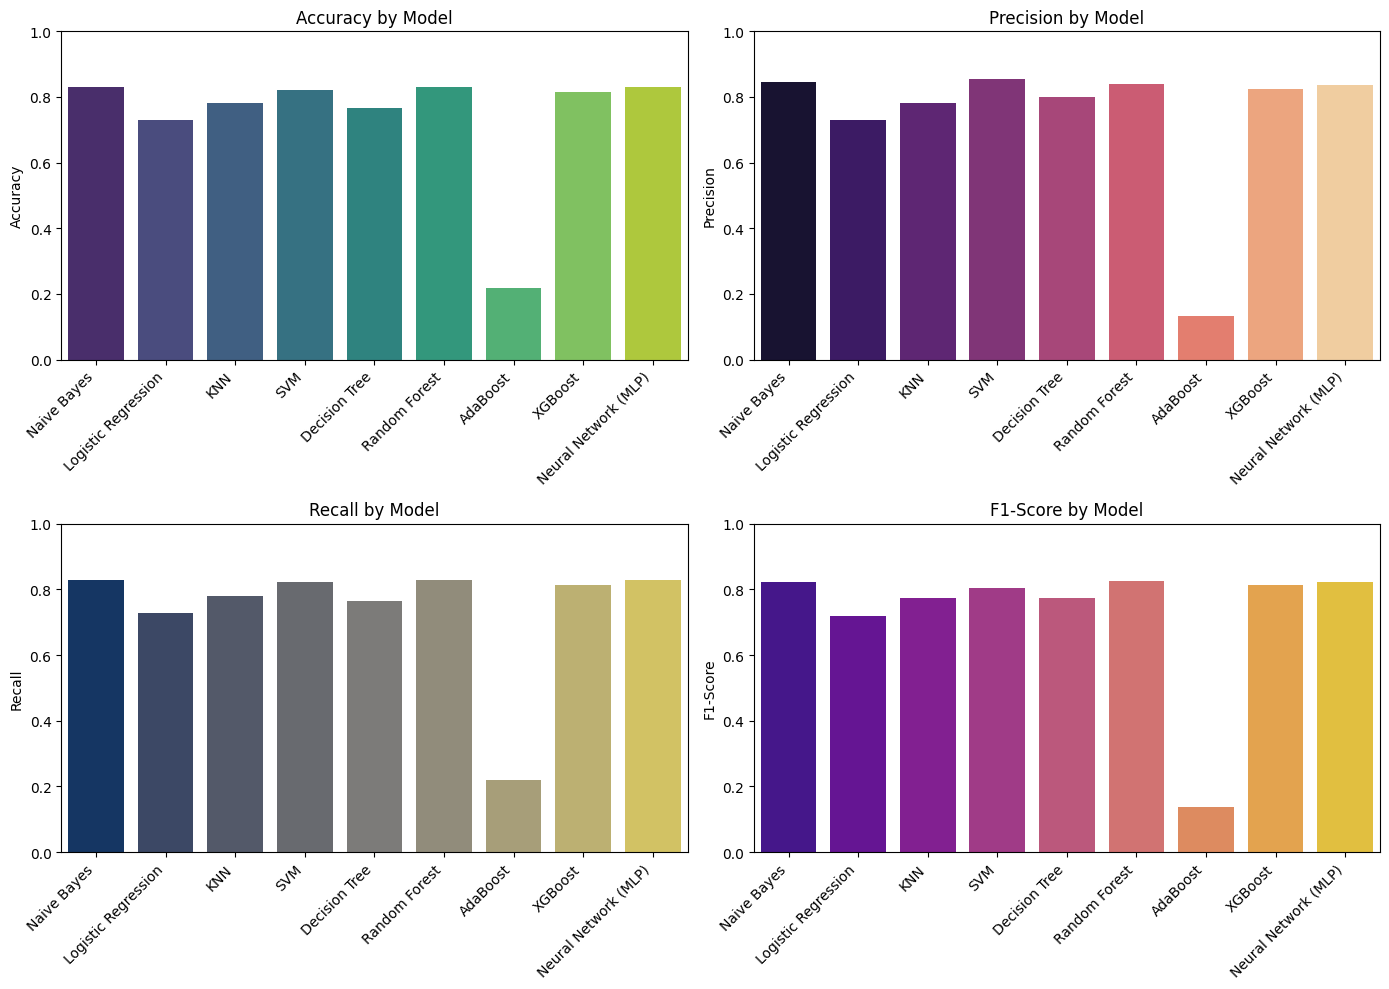

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x='Model', y='Accuracy', data=model_metrics, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy by Model')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_ylim(0, 1)

sns.barplot(x='Model', y='Precision', data=model_metrics, ax=axes[0, 1], palette='magma')
axes[0, 1].set_title('Precision by Model')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_ylim(0, 1)

sns.barplot(x='Model', y='Recall', data=model_metrics, ax=axes[1, 0], palette='cividis')
axes[1, 0].set_title('Recall by Model')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_ylim(0, 1)

sns.barplot(x='Model', y='F1-Score', data=model_metrics, ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('F1-Score by Model')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_ylim(0, 1)


plt.tight_layout()
plt.show()

### Confusion Matrix

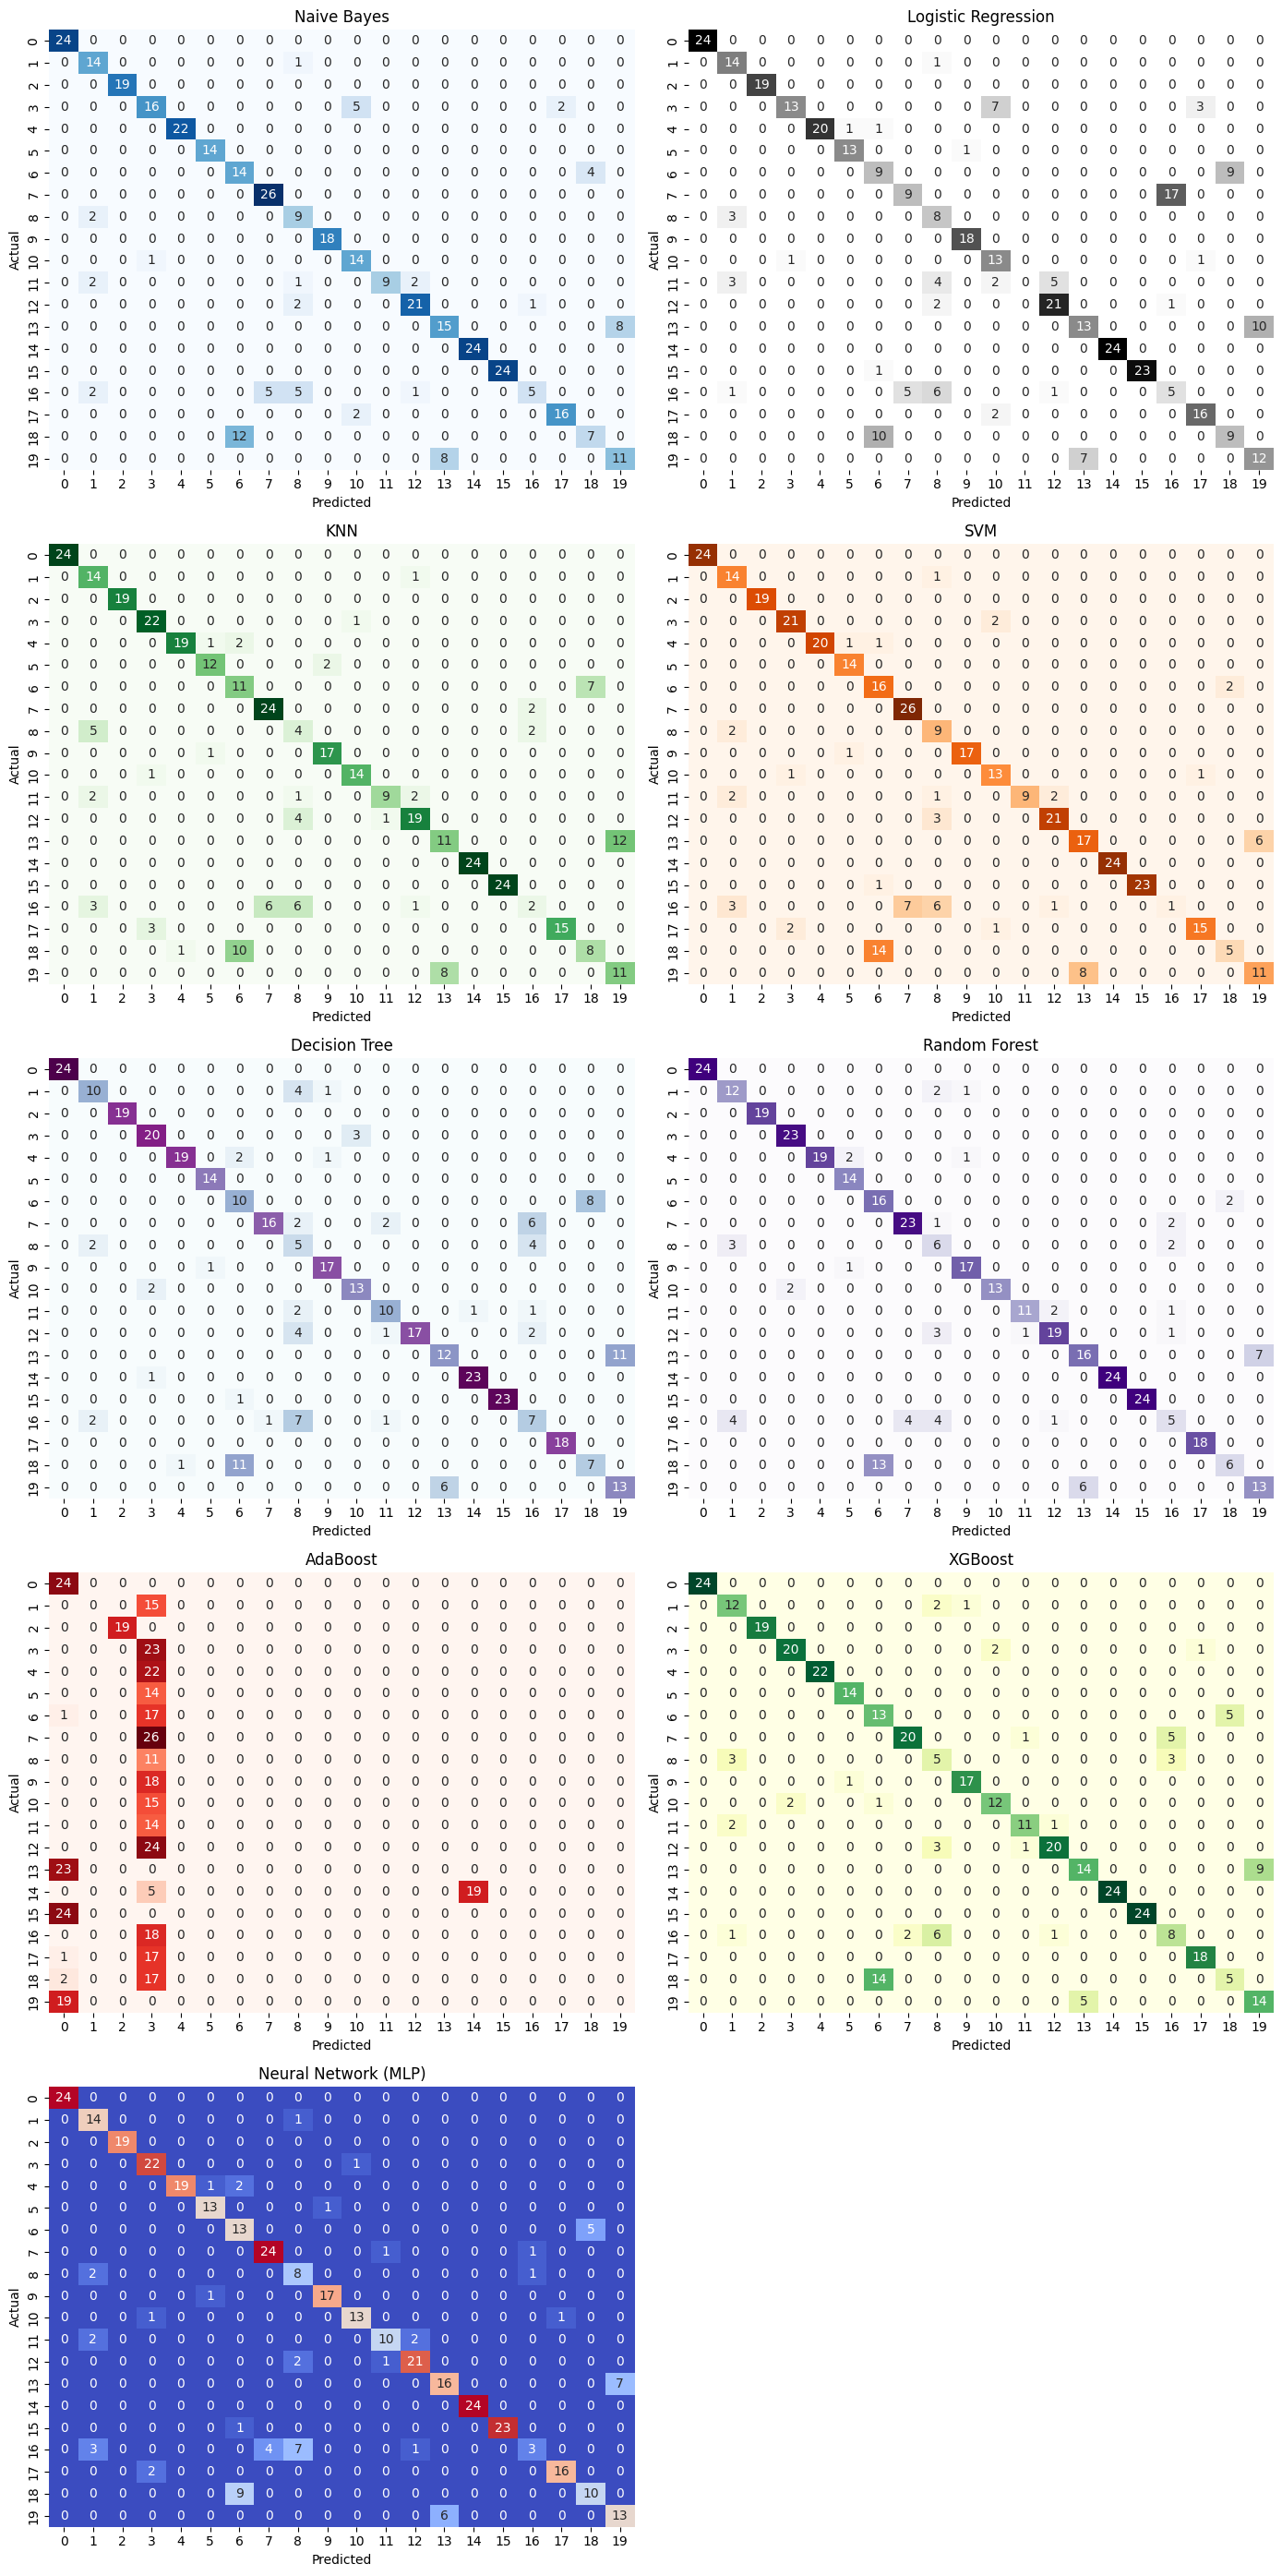

In [35]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(5, 2, figsize=(14, 28))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0], cbar=False)
axes[0, 0].set_title('Naive Bayes')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greys', ax=axes[0, 1], cbar=False)
axes[0, 1].set_title('Logistic Regression')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0], cbar=False)
axes[1, 0].set_title('KNN')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1], cbar=False)
axes[1, 1].set_title('SVM')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='BuPu', ax=axes[2, 0], cbar=False)
axes[2, 0].set_title('Decision Tree')
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Actual')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', ax=axes[2, 1], cbar=False)
axes[2, 1].set_title('Random Forest')
axes[2, 1].set_xlabel('Predicted')
axes[2, 1].set_ylabel('Actual')

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Reds', ax=axes[3, 0], cbar=False)
axes[3, 0].set_title('AdaBoost')
axes[3, 0].set_xlabel('Predicted')
axes[3, 0].set_ylabel('Actual')

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlGn', ax=axes[3, 1], cbar=False)
axes[3, 1].set_title('XGBoost')
axes[3, 1].set_xlabel('Predicted')
axes[3, 1].set_ylabel('Actual')

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='coolwarm', ax=axes[4, 0], cbar=False)
axes[4, 0].set_title('Neural Network (MLP)')
axes[4, 0].set_xlabel('Predicted')
axes[4, 0].set_ylabel('Actual')

axes[4, 1].axis('off')

plt.tight_layout()
plt.show()

## Cross-Validation for Best Models
Based on the results above, Naive Bayes, Random Forest, XGBoost and MLP appear to be the best performing models. Let's perform cross-validation to confirm which one generalizes better.

In [36]:
from sklearn.model_selection import cross_val_score

models_cv = {
    'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Neural Network (MLP)': mlp_model
}

cv_results_list = []

for name, model in models_cv.items():
    cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    cv_precision = cross_val_score(model, X, y, cv=10, scoring='precision_weighted')
    cv_recall = cross_val_score(model, X, y, cv=10, scoring='recall_weighted')
    cv_f1 = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')

    cv_results_list.append({
        'Model': name,
        'CV Accuracy (Mean)': cv_accuracy.mean(),
        'CV Accuracy (Std)': cv_accuracy.std(),
        'CV Precision (Mean)': cv_precision.mean(),
        'CV Precision (Std)': cv_precision.std(),
        'CV Recall (Mean)': cv_recall.mean(),
        'CV Recall (Std)': cv_recall.std(),
        'CV F1-Score (Mean)': cv_f1.mean(),
        'CV F1-Score (Std)': cv_f1.std()
    })

cv_results = pd.DataFrame(cv_results_list)
cv_results

,Model,CV Accuracy (Mean),CV Accuracy (Std),CV Precision (Mean),CV Precision (Std),CV Recall (Mean),CV Recall (Std),CV F1-Score (Mean),CV F1-Score (Std)
0,Naive Bayes,0.805368,0.021138,0.815236,0.023859,0.805368,0.021138,0.800562,0.022054
1,Random Forest,0.816725,0.024356,0.824110,0.025787,0.816725,0.024356,0.812062,0.024731
2,XGBoost,0.812598,0.023740,0.816680,0.026938,0.812598,0.023740,0.809678,0.024705
3,Neural Network (MLP),0.805902,0.022587,0.819555,0.028006,0.805902,0.022587,0.801996,0.022104


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/1161122230.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/1161122230.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/1161122230.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/1161122230.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



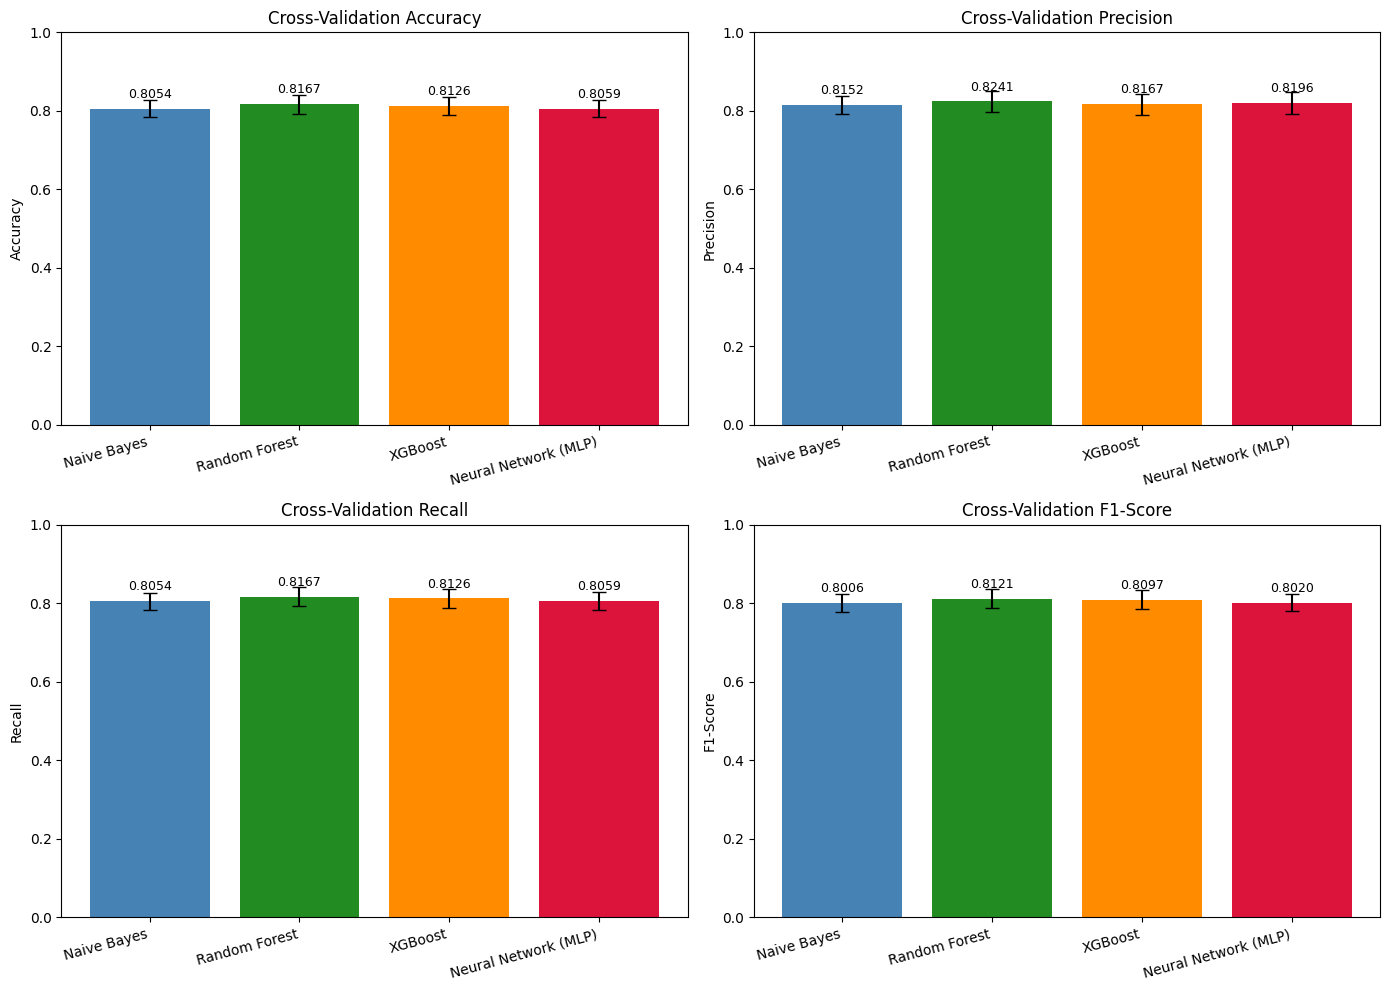

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_cv = ['CV Accuracy (Mean)', 'CV Precision (Mean)', 'CV Recall (Mean)', 'CV F1-Score (Mean)']
std_cols = ['CV Accuracy (Std)', 'CV Precision (Std)', 'CV Recall (Std)', 'CV F1-Score (Std)']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['steelblue', 'forestgreen', 'darkorange', 'crimson']

for idx, (metric, std_col, title) in enumerate(zip(metrics_cv, std_cols, titles)):
    ax = axes[idx // 2, idx % 2]
    bars = ax.bar(cv_results['Model'], cv_results[metric], color=colors, yerr=cv_results[std_col], capsize=5)
    ax.set_title(f'Cross-Validation {title}')
    ax.set_ylabel(title)
    ax.set_ylim(0, 1)
    ax.set_xticklabels(cv_results['Model'], rotation=15, ha='right')

    for bar, val in zip(bars, cv_results[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{val:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### ROC Curve

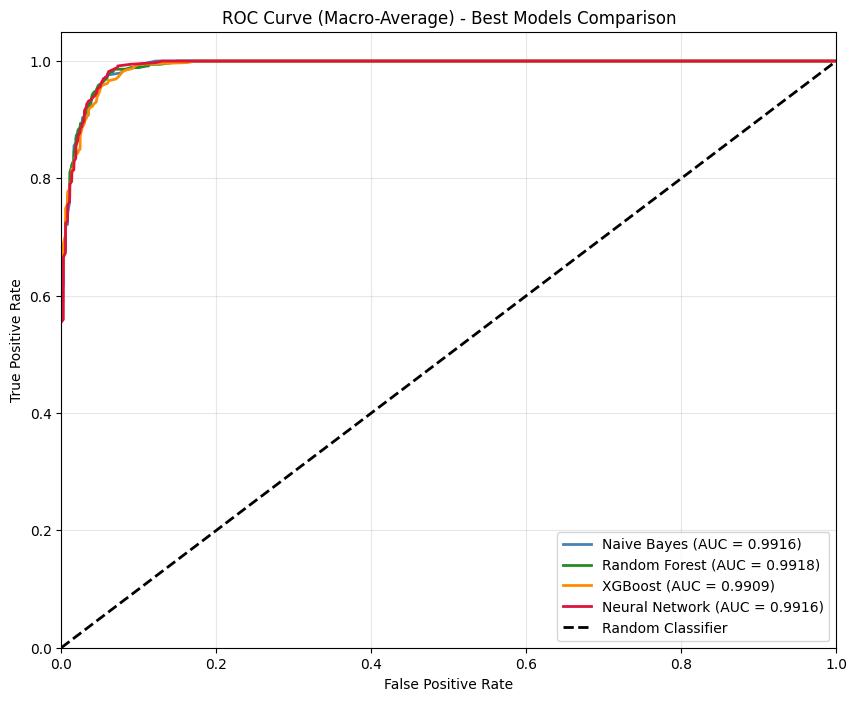

In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = np.unique(y)
n_classes = len(classes)
y_test_bin = label_binarize(y_test, classes=classes)

nb_proba = nb_model.predict_proba(X_test)
rf_proba = rf_model.predict_proba(X_test)
xgb_proba = xgb_model.predict_proba(X_test)
mlp_proba = mlp_model.predict_proba(X_test)

def calculate_roc_auc(y_true_bin, y_proba, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    return all_fpr, mean_tpr, auc(all_fpr, mean_tpr)

nb_fpr, nb_tpr, nb_auc = calculate_roc_auc(y_test_bin, nb_proba, n_classes)
rf_fpr, rf_tpr, rf_auc = calculate_roc_auc(y_test_bin, rf_proba, n_classes)
xgb_fpr, xgb_tpr, xgb_auc = calculate_roc_auc(y_test_bin, xgb_proba, n_classes)
mlp_fpr, mlp_tpr, mlp_auc = calculate_roc_auc(y_test_bin, mlp_proba, n_classes)

plt.figure(figsize=(10, 8))
plt.plot(nb_fpr, nb_tpr, color='steelblue', lw=2, label=f'Naive Bayes (AUC = {nb_auc:.4f})')
plt.plot(rf_fpr, rf_tpr, color='forestgreen', lw=2, label=f'Random Forest (AUC = {rf_auc:.4f})')
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'XGBoost (AUC = {xgb_auc:.4f})')
plt.plot(mlp_fpr, mlp_tpr, color='crimson', lw=2, label=f'Neural Network (AUC = {mlp_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Macro-Average) - Best Models Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()



In [39]:
print("AUC Scores:")
print(f"Naive Bayes AUC: {nb_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"XGBoost AUC: {xgb_auc:.4f}")
print(f"Neural Network (MLP) AUC: {mlp_auc:.4f}")

AUC Scores:
Naive Bayes AUC: 0.9916
Random Forest AUC: 0.9918
XGBoost AUC: 0.9909
Neural Network (MLP) AUC: 0.9916


## Feature Importance Analysis
Let's identify which predictor variable has the most predictive power using multiple approaches.

### 1. ANOVA (Analysis of Variance)
ANOVA tests whether there are significant differences in each predictor variable across the different crop classes.

In [40]:
from scipy import stats

crops_clean_with_names = crops.loc[crops_clean.index]

anova_results = []
for feature in ['N', 'P', 'K', 'ph']:
    groups = [crops_clean_with_names[crops_clean_with_names['crop'] == crop][feature].values for crop in crops_clean_with_names['crop'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results.append({
        'Feature': feature,
        'F-Statistic': f_stat,
        'P-Value': p_value
    })

anova_df = pd.DataFrame(anova_results).sort_values('F-Statistic', ascending=False)
anova_df

,Feature,F-Statistic,P-Value
2,K,2770.705865,0.000000e+00
0,N,908.547957,0.000000e+00
1,P,791.002899,0.000000e+00
3,ph,74.575915,5.884392e-214


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/2238636443.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




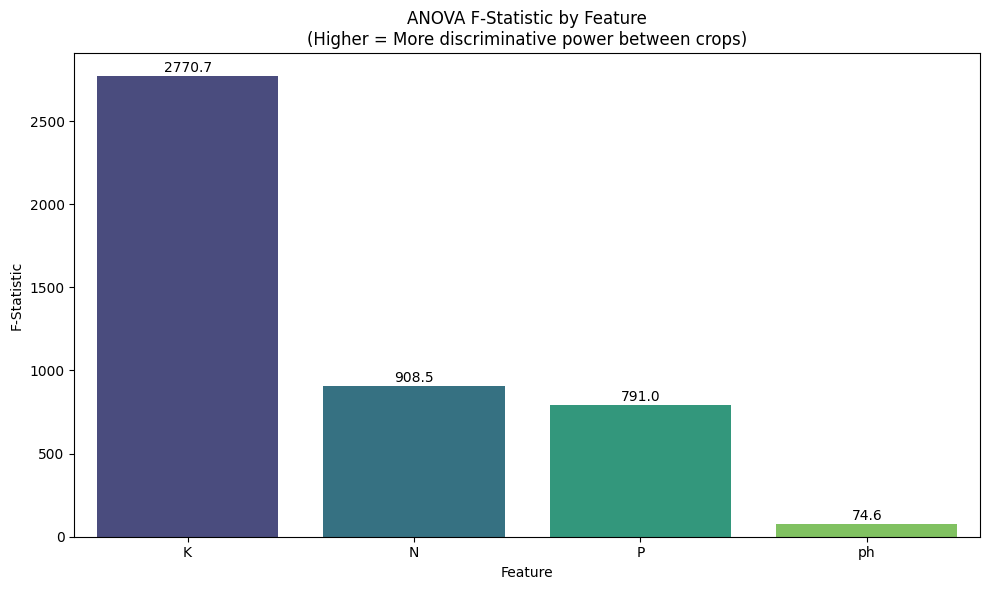

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = sns.barplot(x='Feature', y='F-Statistic', data=anova_df, palette='viridis', ax=ax)
ax.set_title('ANOVA F-Statistic by Feature\n(Higher = More discriminative power between crops)')
ax.set_xlabel('Feature')
ax.set_ylabel('F-Statistic')

for bar, val in zip(ax.patches, anova_df['F-Statistic']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{val:.1f}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 2. Feature Importance from Tree-Based Models
Random Forest and XGBoost can directly provide feature importance scores.

/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/4074824187.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/v9/33n_m6kj77q0lg3x83y96mb80000gp/T/ipykernel_97655/4074824187.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




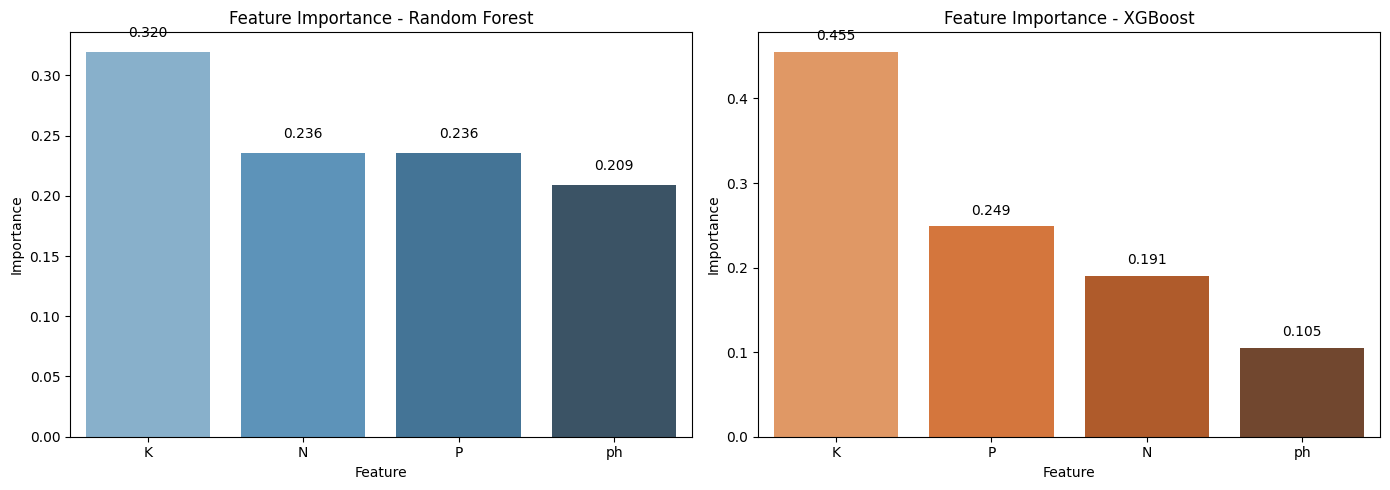

In [42]:
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='Feature', y='Importance', data=rf_importance, palette='Blues_d', ax=axes[0])
axes[0].set_title('Feature Importance - Random Forest')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Importance')
for bar, val in zip(axes[0].patches, rf_importance['Importance']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.3f}',
                 ha='center', va='bottom', fontsize=10)

sns.barplot(x='Feature', y='Importance', data=xgb_importance, palette='Oranges_d', ax=axes[1])
axes[1].set_title('Feature Importance - XGBoost')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Importance')
for bar, val in zip(axes[1].patches, xgb_importance['Importance']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{val:.3f}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [43]:
print("Feature Importance Rankings:")
print("\nRandom Forest:")
print(rf_importance.to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.to_string(index=False))

Feature Importance Rankings:

Random Forest:
Feature  Importance
      K    0.319687
      N    0.235794
      P    0.235674
     ph    0.208846

XGBoost:
Feature  Importance
      K    0.455435
      P    0.248674
      N    0.190588
     ph    0.105303


### 3. Single Feature Model Performance
Train models using each feature individually to see which one alone provides the best predictive power.

In [44]:
single_feature_results = []

for feature in ['N', 'P', 'K', 'ph']:
    X_single_train = X_train[[feature]]
    X_single_test = X_test[[feature]]

    model = LogisticRegression(max_iter=2000, random_state=42)
    model.fit(X_single_train, y_train)
    y_pred = model.predict(X_single_test)

    single_feature_results.append({
        'Feature': feature,
        'Accuracy': metrics.accuracy_score(y_test, y_pred),
        'F1-Score': metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

single_feature_df = pd.DataFrame(single_feature_results).sort_values('F1-Score', ascending=False)
single_feature_df

,Feature,Accuracy,F1-Score
2,K,0.262887,0.167308
1,P,0.185567,0.128466
0,N,0.149485,0.091309
3,ph,0.079897,0.053399


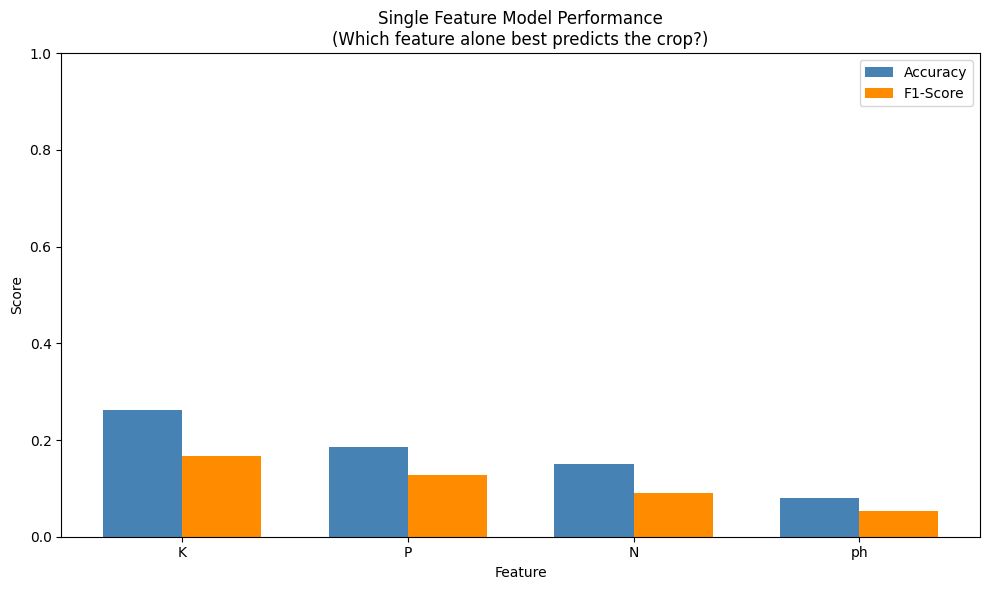

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(single_feature_df))
width = 0.35

bars1 = ax.bar(x - width/2, single_feature_df['Accuracy'], width, label='Accuracy', color='steelblue')
bars2 = ax.bar(x + width/2, single_feature_df['F1-Score'], width, label='F1-Score', color='darkorange')

ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Single Feature Model Performance\n(Which feature alone best predicts the crop?)')
ax.set_xticks(x)
ax.set_xticklabels(single_feature_df['Feature'])
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Feature Importance Summary

In [46]:
print("=" * 60)
print("FEATURE IMPORTANCE SUMMARY")
print("=" * 60)

best_anova = anova_df.iloc[0]['Feature']
print(f"\n1. ANOVA (F-Statistic):")
print(f"   Most important feature: {best_anova}")

best_rf = rf_importance.iloc[0]['Feature']
print(f"\n2. Random Forest Feature Importance:")
print(f"   Most important feature: {best_rf}")

best_xgb = xgb_importance.iloc[0]['Feature']
print(f"\n3. XGBoost Feature Importance:")
print(f"   Most important feature: {best_xgb}")

best_single = single_feature_df.iloc[0]['Feature']
print(f"\n4. Single Feature Model Performance (F1-Score):")
print(f"   Most important feature: {best_single}")

print("\n" + "=" * 60)
all_best = [best_anova, best_rf, best_xgb, best_single]
from collections import Counter
consensus = Counter(all_best).most_common(1)[0]
print(f"\nCONSENSUS: The most important predictor variable is '{consensus[0]}'")
print(f"(Agreed by {consensus[1]} out of 4 methods)")
print("=" * 60)

FEATURE IMPORTANCE SUMMARY

1. ANOVA (F-Statistic):
   Most important feature: K

2. Random Forest Feature Importance:
   Most important feature: K

3. XGBoost Feature Importance:
   Most important feature: K

4. Single Feature Model Performance (F1-Score):
   Most important feature: K


CONSENSUS: The most important predictor variable is 'K'
(Agreed by 4 out of 4 methods)


## Best Predictive Feature

In [47]:
best_predictive_feature = dict()
best_predictive_feature[best_anova] = anova_df.iloc[0]['F-Statistic']

best_predictive_feature

{'K': np.float64(2770.705865294092)}

### Conclusion

In [48]:
best_model_idx = cv_results['CV F1-Score (Mean)'].idxmax()
best_model = cv_results.loc[best_model_idx, 'Model']
best_f1 = cv_results.loc[best_model_idx, 'CV F1-Score (Mean)']

print(f"Best Model: {best_model}")
print(f"Cross-Validation F1-Score: {best_f1:.4f}")
print(f"\nThe {best_model} model shows the best generalization performance based on 10-fold cross-validation.")


Best Model: Random Forest
Cross-Validation F1-Score: 0.8121

The Random Forest model shows the best generalization performance based on 10-fold cross-validation.


## Hyperparameter Tuning with GridSearchCV
Let's optimize the Random Forest model using GridSearchCV to find the best hyperparameters.

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")

Starting GridSearchCV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation F1-Score: 0.8157


In [50]:
rf_optimized = grid_search.best_estimator_
y_pred_rf_opt = rf_optimized.predict(X_test)

print("Optimized Random Forest Performance:")
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred_rf_opt):.4f}")
print(f"Precision: {metrics.precision_score(y_test, y_pred_rf_opt, average='weighted', zero_division=0):.4f}")
print(f"Recall: {metrics.recall_score(y_test, y_pred_rf_opt, average='weighted', zero_division=0):.4f}")
print(f"F1-Score: {metrics.f1_score(y_test, y_pred_rf_opt, average='weighted', zero_division=0):.4f}")

print("\n" + "=" * 50)
print("Comparison: Original vs Optimized Random Forest")
print("=" * 50)
print(f"Original F1-Score: {metrics.f1_score(y_test, y_pred_rf, average='weighted', zero_division=0):.4f}")
print(f"Optimized F1-Score: {metrics.f1_score(y_test, y_pred_rf_opt, average='weighted', zero_division=0):.4f}")
improvement = (metrics.f1_score(y_test, y_pred_rf_opt, average='weighted', zero_division=0) -
               metrics.f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)) * 100
print(f"Improvement: {improvement:+.2f}%")


Optimized Random Forest Performance:
Accuracy: 0.8273
Precision: 0.8605
Recall: 0.8273
F1-Score: 0.8162

Comparison: Original vs Optimized Random Forest
Original F1-Score: 0.8252
Optimized F1-Score: 0.8162
Improvement: -0.90%


In [51]:
if improvement < 0:
    print("\n" + "=" * 60)
    print("NOTE: Why did optimization worsen the model?")
    print("=" * 60)
    print("""
This can happen due to:
1. Overfitting to CV folds: GridSearchCV optimizes for validation
   folds, not the independent test set.
2. Default parameters are already optimal: scikit-learn's defaults
   are well-tuned for most datasets.
3. Statistical variance: With small datasets, differences may be
   noise rather than real improvements.
4. Grid search overfitting: Testing 108 combinations increases the
   chance of finding parameters that work well by chance on CV.

Recommendation: Keep the original Random Forest model with default
parameters, as it shows better generalization on the test set.
""")
    print("=" * 60)



NOTE: Why did optimization worsen the model?

This can happen due to:
1. Overfitting to CV folds: GridSearchCV optimizes for validation
   folds, not the independent test set.
2. Default parameters are already optimal: scikit-learn's defaults
   are well-tuned for most datasets.
3. Statistical variance: With small datasets, differences may be
   noise rather than real improvements.
4. Grid search overfitting: Testing 108 combinations increases the
   chance of finding parameters that work well by chance on CV.

Recommendation: Keep the original Random Forest model with default
parameters, as it shows better generalization on the test set.



## Best Model Selection

Based on these results we can conclude that the best model for predicting the crop type based on the given features is the Random Forest model with default parameters, as it achieved the highest F1-Score on the test set and showed good generalization in cross-validation. The hyperparameter tuning did not improve performance, likely due to overfitting to the CV folds or because the default parameters were already well-suited for this dataset.


## Save Model

In [52]:
import pickle

with open('crop_prediction_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

print("Model saved successfully!")
print("Files created:")
print("  - crop_prediction_model.pkl (Random Forest model)")
print("  - scaler.pkl (StandardScaler for feature normalization)")
print("  - label_encoder.pkl (LabelEncoder for target variable)")


Model saved successfully!
Files created:
  - crop_prediction_model.pkl (Random Forest model)
  - scaler.pkl (StandardScaler for feature normalization)
  - label_encoder.pkl (LabelEncoder for target variable)


## Interactive Crop Predictor
Use the form below to input soil measurements and get a crop recommendation.

In [53]:
import ipywidgets as widgets
from IPython.display import display

n_input = widgets.FloatText(value=50, description='Nitrogen (N):', style={'description_width': '120px'})
p_input = widgets.FloatText(value=50, description='Phosphorus (P):', style={'description_width': '120px'})
k_input = widgets.FloatText(value=50, description='Potassium (K):', style={'description_width': '120px'})
ph_input = widgets.FloatText(value=6.5, description='pH:', style={'description_width': '120px'})

output = widgets.Output()

def predict_crop(b):
    with output:
        output.clear_output()
        try:
            features = np.array([[n_input.value, p_input.value, k_input.value, ph_input.value]])
            features_scaled = scaler.transform(features)
            prediction = rf_model.predict(features_scaled)
            crop_name = encoder.inverse_transform(prediction)[0]
            proba = rf_model.predict_proba(features_scaled)[0]
            max_proba = max(proba) * 100

            print(f"{'='*50}")
            print(f"🌱 Recommended Crop: {crop_name.upper()}")
            print(f"📊 Confidence: {max_proba:.1f}%")
            print(f"{'='*50}")
        except Exception as e:
            print(f"Error: {e}")

predict_btn = widgets.Button(description='Predict Crop', button_style='success', icon='leaf')
predict_btn.on_click(predict_crop)

form = widgets.VBox([
    widgets.HTML('<h3>🌾 Crop Predictor</h3>'),
    n_input, p_input, k_input, ph_input,
    predict_btn,
    output
])

display(form)

